In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

csv_url = "data.csv"

In [24]:
def api_run():
  global df_new
  from requests import Request, Session
  from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
  import json

  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'a6585130-9a4d-4f6a-81e8-71420dea77d6',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    # print(data)
    #I have commented this as the 'data' is more than 10mb, so it creates an error
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
  df_new = pd.json_normalize(data["data"])
  df_new["timestamp"] = datetime.now()

In [25]:
pd.set_option("display.max.rows", 300)
pd.set_option("display.max.columns", 300)

In [26]:
#Uncomment and Run to create a fresh CSV file

# api_run()
# df_new.drop(df_new.index, inplace=True)
# df_new.to_csv(csv_url,index=False)

In [27]:
import time

#you can set the range for 10,000 and run it for month and then put time.sleep accordingly
for i in range(2):
  api_run()
  df_new.to_csv(csv_url, mode="a", header=False, index=False)
  # time.sleep(60)
  print(f"DF{i} created")


DF0 created
DF1 created


In [28]:
df = pd.read_csv(csv_url)
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10414,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.946795e+07,1.946795e+07,False,NaN,1,NaN,NaN,NaN,2023-08-26T04:35:00.000Z,26056.773808,1.185375e+10,-7.3315,-0.033576,0.088819,0.326190,-11.541958,-14.245822,-4.158507,5.072720e+11,48.2742,5.471922e+11,NaN,2023-08-26T04:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-26 10:07:27.491160
1,1027,Ethereum,ETH,ethereum,7260,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202162e+08,1.202162e+08,True,NaN,2,NaN,NaN,NaN,2023-08-26T04:35:00.000Z,1651.733013,5.011598e+09,-5.6484,-0.096884,0.133867,-0.514538,-12.111233,-11.849471,-10.746797,1.985650e+11,18.8966,1.985650e+11,NaN,2023-08-26T04:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-26 10:07:27.491160
2,825,Tether USDt,USDT,tether,60017,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.285160e+10,8.543926e+10,True,NaN,3,NaN,NaN,NaN,2023-08-26T04:35:00.000Z,0.999533,1.878717e+10,-9.0272,0.005270,-0.024287,-0.010956,-0.039938,-0.064404,-0.086756,8.281287e+10,7.8812,8.539932e+10,NaN,2023-08-26T04:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-26 10:07:27.491160
3,1839,BNB,BNB,bnb,1576,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538511e+08,1.538511e+08,False,NaN,4,NaN,NaN,NaN,2023-08-26T04:35:00.000Z,217.447413,4.309827e+08,3.5856,-0.077382,0.643770,0.942888,-9.548119,-8.690417,-29.576311,3.345452e+10,3.1837,3.345452e+10,NaN,2023-08-26T04:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-26 10:07:27.491160
4,52,XRP,XRP,xrp,1040,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.291419e+10,9.998849e+10,False,NaN,5,NaN,NaN,NaN,2023-08-26T04:35:00.000Z,0.522054,1.004998e+09,11.8456,-0.419619,1.284896,3.199775,-27.535572,8.218378,10.268575,2.762409e+10,2.6290,5.220545e+10,NaN,2023-08-26T04:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-26 10:07:27.491160


In [29]:
per_change = df.groupby("name")[["quote.USD.percent_change_1h","quote.USD.percent_change_24h","quote.USD.percent_change_7d","quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"]].mean()
per_change

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
BNB,-0.066738,0.834012,0.923624,-9.864805,-8.634961,-29.560910
Bitcoin,-0.025754,0.072864,0.350399,-11.573981,-14.206800,-4.153646
Cardano,-0.039693,-0.675798,-0.827818,-16.815288,-7.776687,-30.413244
Dai,-0.034783,0.062931,-0.002119,-0.043142,-0.016405,-0.000604
Dogecoin,-0.023448,1.746068,-0.870252,-19.414217,-3.145611,-13.268104
Ethereum,-0.095994,0.112034,-0.492534,-12.133658,-11.774474,-10.729369
Polkadot,-0.072357,2.571575,0.156263,-15.178171,-11.624659,-16.452995
Polygon,-0.139838,1.346342,-5.385833,-25.156821,-16.806923,-41.108442
Shiba Inu,0.079069,1.760600,-3.692965,3.909685,7.708680,-7.345816


In [30]:
stack = per_change.stack()
df_stack = pd.DataFrame(stack)
df_stack = df_stack.reset_index()
df_stack = df_stack.rename(columns={0:"values", "level_1":"per_change"})
df_stack = df_stack.replace(["quote.USD.percent_change_1h",'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d',"quote.USD.percent_change_90d"],["1h",'24','7d','30d','60d','90d'])
df_stack.head(10)

,name,per_change,values
0,BNB,1h,-0.066738
1,BNB,24,0.834012
2,BNB,7d,0.923624
3,BNB,30d,-9.864805
4,BNB,60d,-8.634961
5,BNB,90d,-29.560910
6,Bitcoin,1h,-0.025754
7,Bitcoin,24,0.072864
8,Bitcoin,7d,0.350399
9,Bitcoin,30d,-11.573981


e:\Documents(E)\Code\Crypto\cryto\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


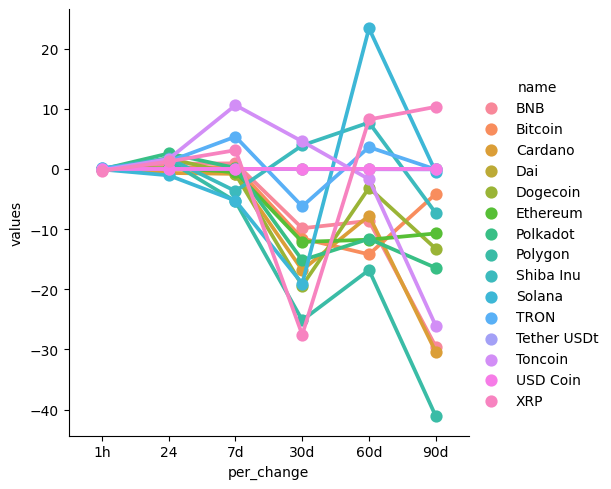

In [31]:
import seaborn as sns
sns.catplot(x="per_change", y="values", hue="name",data=df_stack, kind="point")

In [32]:
temp = df_stack[df_stack['name']=="Bitcoin"]
temp

,name,per_change,values
6,Bitcoin,1h,-0.025754
7,Bitcoin,24,0.072864
8,Bitcoin,7d,0.350399
9,Bitcoin,30d,-11.573981
10,Bitcoin,60d,-14.206800
11,Bitcoin,90d,-4.153646


e:\Documents(E)\Code\Crypto\cryto\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


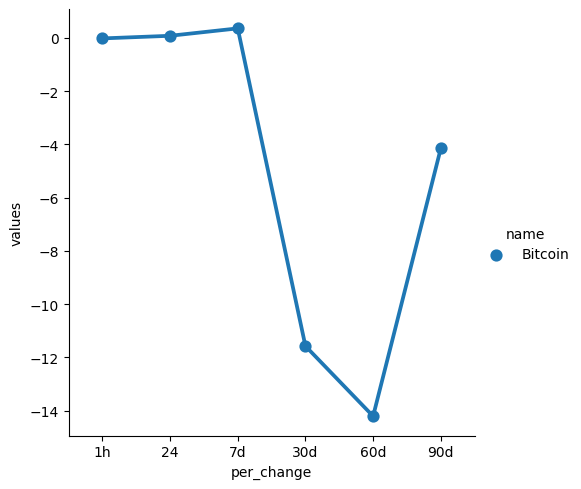

In [33]:
temp = df_stack[df_stack['name']=="Bitcoin"]
sns.catplot(x="per_change", y="values", hue="name",data=temp, kind="point")